In [27]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display as dis
from scipy.io import wavfile
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import os

### Input data

In [28]:
cwd = os.getcwd() # Get the current working directory
#print(cwd)
pathTo3SecFeatures = '/Input/Data/features_3_sec.csv'
input_data = pd.read_csv(cwd+pathTo3SecFeatures)

In [29]:
# List of features:
input_data.columns[2:59]

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'],
      dtype='object')

### Exploratory data analysis

- Descrptive statistics

In [30]:
input_data.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


- Correlation computation

In [31]:
# We consider the features 'mfcc1_mean' and 'mfcc2_mean'
input_data['mfcc1_mean'].corr(input_data['mfcc2_mean'])

-0.61230956073804

- Null values inspection

In [32]:
input_data.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

### Data preprocessing

In [33]:
# Remove duplicate rows
input_data = input_data.drop_duplicates()

<AxesSubplot:xlabel='chroma_stft_mean'>

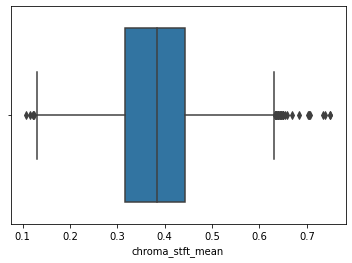

In [34]:
# Visualizing outliers using boxplot
# Example: chroma_stft_mean
sns.boxplot(x=input_data['chroma_stft_mean'])

In [35]:
# Detect outliers and replace them with lower/upper whisker
# Method used: Interquartile range
for col_name in input_data.select_dtypes(exclude=['object']).columns:
    Q1 = input_data[col_name].quantile(0.25)
    Q3 = input_data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 +(whisker_width*IQR)
    #Replacing with upper whisker for upper values and lower whisker for lower values
    count = 0
    for val in input_data[col_name].values:
        if val>upper_whisker or val<lower_whisker:
            count += 1
    input_data[col_name]=np.where(input_data[col_name]>upper_whisker,upper_whisker,np.where(input_data[col_name]<lower_whisker,lower_whisker,input_data[col_name]))

In [38]:
input_data.to_csv('preprocessed_data_3_secs.csv')

In [39]:
pathTo3SecFeaturesPreprocessed = '/Input/Data/preprocessed_data_3_secs.csv'
input_data = pd.read_csv(cwd+pathTo3SecFeaturesPreprocessed)

### Creating labels, Scaling data and Splitting training and testing data

In [40]:
input_data.shape

(9847, 61)

In [41]:
select_cols = input_data.iloc[:, 3:60]
# Creating labels
labels = input_data.iloc[:, [60]]
le = preprocessing.LabelEncoder()
le.fit(labels.label)
labels['categorical_label'] = le.transform(labels.label)

<ipython-input-41-da64101ce2a5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['categorical_label'] = le.transform(labels.label)


In [42]:
# Scale data
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(select_cols)
X_scaled = pd.DataFrame(np_scaled, columns = select_cols.columns)

In [43]:
# Split into training and testing
#select_cols = input_data.iloc[:, 3:60]
X_train, X_test, y_train, y_test = train_test_split(select_cols, labels['categorical_label'], test_size=0.33)

In [44]:
select_cols

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9842,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,8.479527e+05,...,5.773784,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969
9843,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,1.170890e+06,...,2.074155,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033
9844,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,2.602871e+06,...,-1.005473,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990
9845,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,4.968878e+05,...,4.123402,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750


### Establishing baseline performance

Training accuracy: 0.4342883128694861
Testing accuracy: 0.43446153846153845
              precision    recall  f1-score   support

       blues       0.34      0.52      0.41       318
   classical       0.64      0.93      0.76       324
     country       0.47      0.08      0.14       339
       disco       0.36      0.09      0.14       334
      hiphop       0.60      0.25      0.36       331
        jazz       0.49      0.35      0.41       324
       metal       0.38      0.91      0.54       311
         pop       0.34      0.92      0.50       314
      reggae       0.59      0.37      0.46       324
        rock       0.00      0.00      0.00       331

    accuracy                           0.43      3250
   macro avg       0.42      0.44      0.37      3250
weighted avg       0.42      0.43      0.37      3250



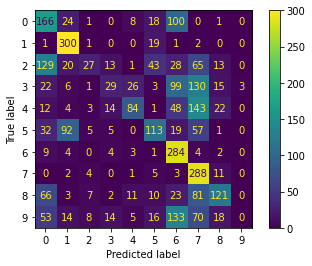

In [45]:
# Random forest classifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
predict_y = clf.predict(X_test)


y_pred_train = clf.predict(X_train)

print(f'Training accuracy: {accuracy_score(y_train,y_pred_train)}')
print(f'Testing accuracy: {accuracy_score(y_test,predict_y)}')

print(classification_report(y_test, predict_y, target_names=labels.label.unique()))
ConfusionMatrixDisplay.from_predictions(y_test, predict_y)
plt.show()

Training accuracy: 0.483856298317417
Testing accuracy: 0.27292307692307693
              precision    recall  f1-score   support

       blues       0.17      0.26      0.21       318
   classical       0.58      0.68      0.63       324
     country       0.21      0.24      0.23       339
       disco       0.17      0.16      0.17       334
      hiphop       0.21      0.19      0.20       331
        jazz       0.26      0.23      0.24       324
       metal       0.31      0.29      0.30       311
         pop       0.35      0.36      0.36       314
      reggae       0.26      0.22      0.24       324
        rock       0.18      0.10      0.13       331

    accuracy                           0.27      3250
   macro avg       0.27      0.27      0.27      3250
weighted avg       0.27      0.27      0.27      3250



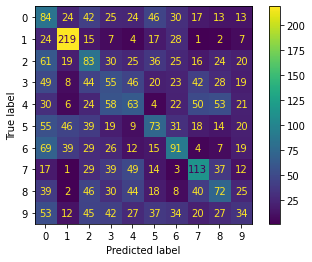

In [46]:
# Knn neighbors
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
predict_y = knn_clf.predict(X_test)

y_pred_train = knn_clf.predict(X_train)

print(f'Training accuracy: {accuracy_score(y_train,y_pred_train)}')
print(f'Testing accuracy: {accuracy_score(y_test,predict_y)}')

print(classification_report(y_test, predict_y, target_names=labels.label.unique()))
ConfusionMatrixDisplay.from_predictions(y_test, predict_y)
plt.show()

Training accuracy: 0.4277701985751099
Testing accuracy: 0.4175384615384615
              precision    recall  f1-score   support

       blues       0.36      0.27      0.31       318
   classical       0.61      0.87      0.71       324
     country       0.46      0.25      0.33       339
       disco       0.31      0.32      0.31       334
      hiphop       0.51      0.22      0.31       331
        jazz       0.61      0.22      0.33       324
       metal       0.32      0.87      0.46       311
         pop       0.57      0.59      0.58       314
      reggae       0.37      0.52      0.43       324
        rock       0.25      0.08      0.13       331

    accuracy                           0.42      3250
   macro avg       0.44      0.42      0.39      3250
weighted avg       0.44      0.42      0.39      3250



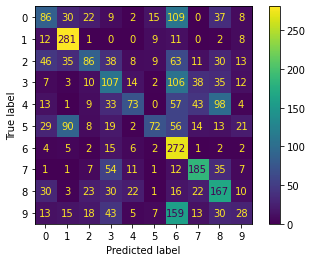

In [47]:
# Gaussian NB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
predict_y = nb_clf.predict(X_test)

y_pred_train = nb_clf.predict(X_train)

print(f'Training accuracy: {accuracy_score(y_train,y_pred_train)}')
print(f'Testing accuracy: {accuracy_score(y_test,predict_y)}')

print(classification_report(y_test, predict_y, target_names=labels.label.unique()))
ConfusionMatrixDisplay.from_predictions(y_test, predict_y)
plt.show()

### Performing PCA

In [49]:
# PCA

X_train_pca = X_train
X_test_pca = X_test
y_train_pca = y_train
y_test_pca = y_test

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train_pca)

# Apply transform to both the training set and the test set.
X_train_pca = scaler.transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train_pca)

X_train_pca = pca.transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

#### Classification after PCA

              precision    recall  f1-score   support

       blues       0.78      0.75      0.76       318
   classical       0.83      0.95      0.89       324
     country       0.67      0.68      0.68       339
       disco       0.66      0.58      0.62       334
      hiphop       0.82      0.73      0.77       331
        jazz       0.78      0.77      0.77       324
       metal       0.79      0.91      0.84       311
         pop       0.73      0.81      0.77       314
      reggae       0.71      0.74      0.73       324
        rock       0.68      0.58      0.63       331

    accuracy                           0.75      3250
   macro avg       0.75      0.75      0.75      3250
weighted avg       0.75      0.75      0.74      3250



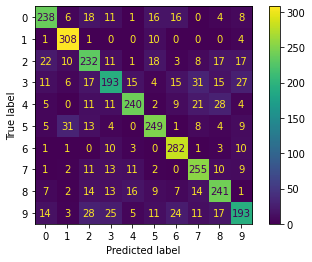

In [50]:
# Random Forest after PCA
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train_pca, y_train_pca)
predict_y = clf.predict(X_test_pca)
print(classification_report(y_test_pca, predict_y, target_names=labels.label.unique()))
ConfusionMatrixDisplay.from_predictions(y_test_pca, predict_y)
plt.show()

              precision    recall  f1-score   support

       blues       0.88      0.87      0.88       318
   classical       0.88      0.94      0.91       324
     country       0.77      0.81      0.79       339
       disco       0.74      0.83      0.78       334
      hiphop       0.86      0.88      0.87       331
        jazz       0.87      0.79      0.83       324
       metal       0.95      0.92      0.94       311
         pop       0.93      0.83      0.88       314
      reggae       0.84      0.91      0.88       324
        rock       0.84      0.74      0.79       331

    accuracy                           0.85      3250
   macro avg       0.86      0.85      0.85      3250
weighted avg       0.85      0.85      0.85      3250



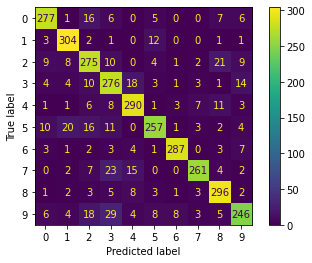

In [51]:
# Knn neighbors after PCA
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_pca, y_train_pca)
predict_y = knn_clf.predict(X_test_pca)
print(classification_report(y_test_pca, predict_y, target_names=labels.label.unique()))
ConfusionMatrixDisplay.from_predictions(y_test_pca, predict_y)
plt.show()

Training accuracy: 0.5942094891617402
Testing accuracy: 0.5809230769230769
              precision    recall  f1-score   support

       blues       0.56      0.44      0.49       318
   classical       0.81      0.81      0.81       324
     country       0.60      0.51      0.55       339
       disco       0.51      0.46      0.48       334
      hiphop       0.68      0.57      0.62       331
        jazz       0.62      0.50      0.55       324
       metal       0.53      0.85      0.65       311
         pop       0.72      0.72      0.72       314
      reggae       0.57      0.59      0.58       324
        rock       0.32      0.39      0.35       331

    accuracy                           0.58      3250
   macro avg       0.59      0.58      0.58      3250
weighted avg       0.59      0.58      0.58      3250



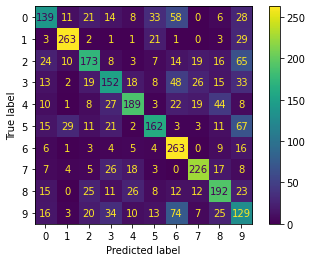

In [52]:
# Gaussian NB after PCA
nb_clf = GaussianNB()
nb_clf.fit(X_train_pca, y_train_pca)
predict_y = nb_clf.predict(X_test_pca)

y_pred_train = nb_clf.predict(X_train_pca)

print(f'Training accuracy: {accuracy_score(y_train_pca,y_pred_train)}')
print(f'Testing accuracy: {accuracy_score(y_test_pca,predict_y)}')

print(classification_report(y_test_pca, predict_y, target_names=labels.label.unique()))
ConfusionMatrixDisplay.from_predictions(y_test_pca, predict_y)
plt.show()

### XGBClassifier

In [ ]:
# XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
predict_y = xgb_clf.predict(X_test)

y_pred_train = xgb_clf.predict(X_train)

print(f'Training accuracy: {accuracy_score(y_train,y_pred_train)}')
print(f'Testing accuracy: {accuracy_score(y_test,predict_y)}')
# print(accuracy(y_test, predict_y))
print(classification_report(y_test, predict_y, target_names=labels.label.unique()))
ConfusionMatrixDisplay.from_predictions(y_test, predict_y)
plt.show()

##### Recursive feature elimination (RFE) on XGBClassifier

In [ ]:
from sklearn.feature_selection import RFECV,mutual_info_regression
estimator = XGBClassifier(eval_metric='merror')
rfecv = RFECV(estimator, step=1, cv=5,scoring='accuracy',verbose=1)
rfecv.fit(X_train, y_train)

features_drop_array = list(np.where(rfecv.support_ == False)[0])
X_train.columns[features_drop_array]

##### features dropped : 

    ['zero_crossing_rate_var', 'mfcc11_var', 'mfcc13_var', 'mfcc14_var',
       'mfcc15_var', 'mfcc16_var', 'mfcc17_var', 'mfcc18_var', 'mfcc19_mean',
       'mfcc20_mean']

In [ ]:
X_train.drop(X_train.columns[features_drop_array], axis=1, inplace=True)
X_test.drop(X_test.columns[features_drop_array], axis=1, inplace=True)

##### Running XGBClassifier after dropping features

In [ ]:
# aa
# XGBClassifier
xgb_clf = XGBClassifier(n_estimators=1000)
xgb_clf.fit(X_train, y_train, eval_metric='merror')
predict_y = xgb_clf.predict(X_test)
# print(accuracy(y_test, predict_y))
y_pred_train = xgb_clf.predict(X_train)

print(f'Training accuracy: {accuracy_score(y_train,y_pred_train)}')
print(f'Testing accuracy: {accuracy_score(y_test,predict_y)}')

print(classification_report(y_test, predict_y, target_names=labels.label.unique()))
ConfusionMatrixDisplay.from_predictions(y_test, predict_y)
plt.show()

##### Hypertuning the parametres of XGBClassifier 

In [ ]:
#For hyperparameter tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={
    'n_estimators': hp.quniform('n_estimators', 0,3000,1),
    'reg_lambda' : hp.quniform('reg_lambda', 0,500,1),
    }

def objective(space):
    clf=XGBClassifier(
                    n_estimators =int(space['n_estimators']),
                    reg_lambda = int(space['reg_lambda']),
                    )
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    return {'loss': -accuracy, 'status': STATUS_OK }


trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print(f"best params: {best_hyperparams}")

##### Running XGBClassifier using best params : 'n_estimators': 1659.0, 'reg_lambda': 92.0

In [ ]:
# aa
# XGBClassifier
xgb_clf = XGBClassifier(n_estimators=1659, reg_lambda=92.0)
xgb_clf.fit(X_train, y_train, eval_metric='merror')
predict_y = xgb_clf.predict(X_test)
# print(accuracy(y_test, predict_y))
y_pred_train = xgb_clf.predict(X_train)

print(f'Training accuracy: {accuracy_score(y_train,y_pred_train)}')
print(f'Testing accuracy: {accuracy_score(y_test,predict_y)}')

print(classification_report(y_test, predict_y, target_names=labels.label.unique()))
ConfusionMatrixDisplay.from_predictions(y_test, predict_y)
plt.show()

#### Permutation Importance Feature Selection on knn_clf

In [ ]:
input_data = pd.read_csv(file_path_3)
select_cols = input_data.iloc[:, 3:60]

# Creating labels
labels = input_data.iloc[:, [60]]
le = preprocessing.LabelEncoder()
le.fit(labels.label)
labels['categorical_label'] = le.transform(labels.label)

#Scaled data
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(select_cols)
X_scaled = pd.DataFrame(np_scaled, columns = select_cols.columns)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels['categorical_label'], test_size=0.33)

import eli5
from eli5.sklearn import PermutationImportance

seed = 12

perm = PermutationImportance(knn_clf, random_state=seed).fit(X_train, y_train, n_iter=10)
print("Feature Importances using Permutation Importance")
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

In [ ]:
# plot the permutation importances
perm_indices = np.argsort(perm.feature_importances_)[::-1]
perm_features = [X_train.columns.tolist()[xx] for xx in perm_indices]
plt.figure(figsize=(14, 14))
plt.title("Knn feature importance via permutation importance")
plt.barh(range(X_train.shape[1]), perm.feature_importances_[perm_indices])
plt.yticks(range(X_train.shape[1]), perm_features)
plt.ylim([X_train.shape[1], -1])
plt.show()

### Trying few more classifiers

In [ ]:
input_data = pd.read_csv(file_path_3)
select_cols = input_data.iloc[:, 3:60]

# Creating labels
labels = input_data.iloc[:, [60]]
le = preprocessing.LabelEncoder()
le.fit(labels.label)
labels['categorical_label'] = le.transform(labels.label)

#Scaled data
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(select_cols)
X_scaled = pd.DataFrame(np_scaled, columns = select_cols.columns)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels['categorical_label'], test_size=0.33)

##### SVM

In [ ]:
# import support vector classifier 

from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
clf.fit(X_train, y_train)
predict_y = clf.predict(X_test)


y_pred_train = clf.predict(X_train)

print(f'Training accuracy: {accuracy_score(y_train,y_pred_train)}')
print(f'Testing accuracy: {accuracy_score(y_test,predict_y)}')

print(classification_report(y_test, predict_y, target_names=labels.label.unique()))
ConfusionMatrixDisplay.from_predictions(y_test, predict_y)
plt.show()

##### MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
predict_y = clf.predict(X_test)


y_pred_train = clf.predict(X_train)

print(f'Training accuracy: {accuracy_score(y_train,y_pred_train)}')
print(f'Testing accuracy: {accuracy_score(y_test,predict_y)}')

print(classification_report(y_test, predict_y, target_names=labels.label.unique()))
ConfusionMatrixDisplay.from_predictions(y_test, predict_y)
plt.show()

##### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
predict_y = clf.predict(X_test)


y_pred_train = clf.predict(X_train)

print(f'Training accuracy: {accuracy_score(y_train,y_pred_train)}')
print(f'Testing accuracy: {accuracy_score(y_test,predict_y)}')

print(classification_report(y_test, predict_y, target_names=labels.label.unique()))
ConfusionMatrixDisplay.from_predictions(y_test, predict_y)
plt.show()

##### LogisticRegression with L1 and L2

In [ ]:
from sklearn.linear_model import LogisticRegression

C = [0.01, 0.10, 1.00]
for c in C:
    clf_l1_LR = LogisticRegression(C=c, penalty="l1", tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=c, penalty="l2", tol=0.01, solver="saga")
    clf_l1_LR.fit(X_train, y_train)
    clf_l2_LR.fit(X_train, y_train)
    predict_y_l1 = clf_l1_LR.predict(X_test)
    predict_y_l2 = clf_l2_LR.predict(X_test)
    y_pred_train_l1 = clf_l1_LR.predict(X_train)
    y_pred_train_l2 = clf_l2_LR.predict(X_train)
    print('C = ', c)
    print(f'Training accuracy L1: {accuracy_score(y_train,y_pred_train_l1)}')
    print(f'Testing accuracy L1: {accuracy_score(y_test,predict_y_l1)}')
    print(f'Training accuracy L2: {accuracy_score(y_train,y_pred_train_l2)}')
    print(f'Testing accuracy L2: {accuracy_score(y_test,predict_y_l2)}')

### RandomForestClassifier (with hypertuning)

##### RandomForestClassifier (max_depth=2)

In [ ]:
# Random forest classifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
predict_y = clf.predict(X_test)


y_pred_train = clf.predict(X_train)

print(f'Training accuracy: {accuracy_score(y_train,y_pred_train)}')
print(f'Testing accuracy: {accuracy_score(y_test,predict_y)}')

print(classification_report(y_test, predict_y, target_names=labels.label.unique()))
ConfusionMatrixDisplay.from_predictions(y_test, predict_y)
plt.show()

##### RandomForestClassifier (without any parameters)

In [ ]:
# Random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predict_y = clf.predict(X_test)


y_pred_train = clf.predict(X_train)

print(f'Training accuracy: {accuracy_score(y_train,y_pred_train)}')
print(f'Testing accuracy: {accuracy_score(y_test,predict_y)}')

print(classification_report(y_test, predict_y, target_names=labels.label.unique()))
ConfusionMatrixDisplay.from_predictions(y_test, predict_y)
plt.show()

##### Hypertuning the parametres of RandomForestClassifier 

In [ ]:
# define parameter space

space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
    "max_depth": hp.quniform("max_depth", 1, 15,1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
}

# define objective function
from sklearn.model_selection import cross_val_score
def hyperparameter_tuning(params):
    clf = RandomForestClassifier(**params,n_jobs=-1)
    acc = cross_val_score(clf, X_train, y_train,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

# Fine tune the model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials
)

print("Best: {}".format(best))

##### RandomForestClassifier with the best parameters :  {'criterion': 1, 'max_depth': 14.0, 'n_estimators': 2}

In [ ]:
# Random forest classifier
clf = RandomForestClassifier(n_estimators= 300, criterion= 'entropy', max_depth= 14, )
clf.fit(X_train, y_train)
predict_y = clf.predict(X_test)


y_pred_train = clf.predict(X_train)

print(f'Training accuracy: {accuracy_score(y_train,y_pred_train)}')
print(f'Testing accuracy: {accuracy_score(y_test,predict_y)}')

print(classification_report(y_test, predict_y, target_names=labels.label.unique()))
ConfusionMatrixDisplay.from_predictions(y_test, predict_y)
plt.show()